In [2]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Versteckt das leere Hauptfenster von Tkinter
root = Tk()
root.withdraw()

# Öffnet ein Dateiauswahlfenster
file_path = askopenfilename(title="Wähle deine CSV-Datei aus")

# Datei einlesen
df = pd.read_csv(file_path)

# Erste Zeilen anzeigen
df.head()


2025-04-21 10:40:20.581 python[20369:408217] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-21 10:40:21.051 python[20369:408217] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],WETTERSTATION,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.396090,8.545105


## Vorbereiten für die Analyse
Um die Auswirkungen verschiedener Wetterfaktoren auf die Verspätungen zu untersuchen, wurden die durchschnittlichen Verspätungswerte unter bestimmten Bedingungen miteinander verglichen. Dabei lag das Augenmerk auf einzelnen Wetterphänomenen wie Niederschlag, Schnee, Wind, Temperatur, Hagel und Nebel.

Als Grundlage für den Vergleich wurde zunächst definiert, was als „günstiges Wetter“ gilt – also Wetterlagen, bei denen keine oder nur sehr geringe witterungsbedingte Verspätungen zu erwarten sind. Die Bedingungen dafür waren: kein Niederschlag, Windgeschwindigkeit unter 20 km/h, keine Neuschneemenge, keine vorhandene Schneedecke, kein Hagel, kein Nebel und eine Temperatur über 10 °C.

Bevor die weiteren Analysen durchgeführt wurden, wurde geprüft, wie viele Datensätze jeweils unter diesen Voraussetzungen vorhanden sind. Auf diese Weise konnte sichergestellt werden, dass die gewählten Kriterien ausreichend Daten liefern und gegebenenfalls angepasst werden müssen, falls die Fallzahl zu gering ist.

Zum Abschluss der jeweiligen Analysen wurde ein T-Test durchgeführt. Dieser diente dazu, zu überprüfen, ob die beobachteten Unterschiede in den durchschnittlichen Verspätungen zwischen den Wettergruppen und den günstigen Bedingungen statistisch signifikant sind oder ob sie auch zufällig entstanden sein könnten. Der T-Test ergänzt die deskriptive Auswertung um eine einfache inferenzstatistische Einschätzung.


,Anzahl Werte,Durchschnitt (s),Median (s),Standardabweichung (s),Minimum (s),Maximum (s)
Wetter mit günstigen Bedingungen,5766614,125.905014,101.0,81.314087,61.0,1800.0


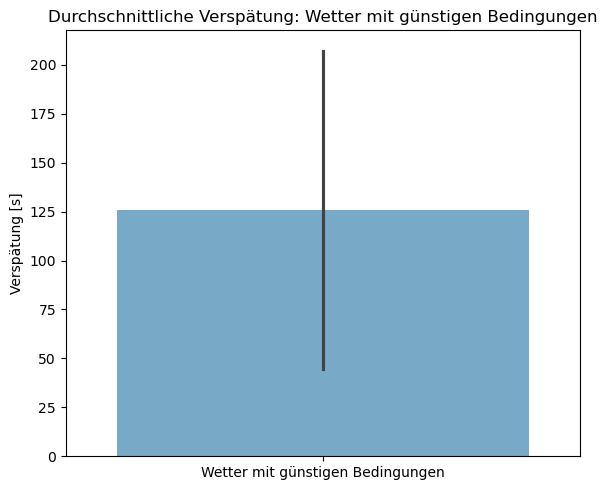

In [6]:
# --- Imports ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Schritt 1: Definition günstiger Wetterbedingungen ---
def wetter_mit_guenstigen_bedingungen(df):
    bedingungen = (
        (df['NIEDERSCHLAG [mm]'] == 0) &
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    )
    return df[bedingungen].copy()

# --- Schritt 2: Statistik berechnen ---
def statistik_berechnen(df, label):
    statistik = {
        'Anzahl Werte': df['VERSPAETUNG [s]'].count(),
        'Durchschnitt (s)': df['VERSPAETUNG [s]'].mean(),
        'Median (s)': df['VERSPAETUNG [s]'].median(),
        'Standardabweichung (s)': df['VERSPAETUNG [s]'].std(),
        'Minimum (s)': df['VERSPAETUNG [s]'].min(),
        'Maximum (s)': df['VERSPAETUNG [s]'].max()
    }
    return pd.DataFrame(statistik, index=[label])

# --- Schritt 3: Plot generieren (angepasst) ---
def plot_verspaetungen(df, label):
    plt.figure(figsize=(6,5))
    sns.barplot(
        data=df.assign(Wetterlage=label),
        x='Wetterlage',
        y='VERSPAETUNG [s]',
        hue='Wetterlage',
        palette='Blues',
        errorbar='sd',
        legend=False
    )
    plt.title(f"Durchschnittliche Verspätung: {label}")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

# --- Ausführung mit deinem DataFrame (df) ---
# Datensatz filtern
wetter_df = wetter_mit_guenstigen_bedingungen(df)

# Statistik anzeigen
stat_df = statistik_berechnen(wetter_df, "Wetter mit günstigen Bedingungen")
display(stat_df)

# Plot anzeigen
plot_verspaetungen(wetter_df, "Wetter mit günstigen Bedingungen")

In [ ]:
## Interpretation der Basiswerte
Bei günstigen Wetterbedingungen lag die durchschnittliche Verspätung bei 126 Sekunden, der Median bei 101 Sekunden. 
Die Werte basieren auf rund 5,77 Mio. Datensätzen. Trotz optimaler Bedingungen treten also leichte Verspätungen auf, 
was diese Gruppe als neutrale Vergleichsbasis geeignet macht.

Im ersten Schritt wurde die Gruppe mit Niederschlag mit den günstigen Wetterbedingungen verglichen. 
Dabei wurde nicht zwischen unterschiedlichen Regenmengen unterschieden – entscheidend war allein, 
ob überhaupt Niederschlag gemessen wurde. Dies erlaubt eine klare Trennung zwischen trockenen und 
nassen Bedingungen und vermeidet eine zu starke Fragmentierung der Daten.

,Anzahl Werte,Durchschnitt (s),Median (s),Standardabweichung (s),Minimum (s),Maximum (s)
Günstig (kein Regen),5766614,125.905014,101.0,81.314087,61.0,1800.0
Günstig (mit Regen),919522,132.851732,105.0,90.139419,61.0,1795.0


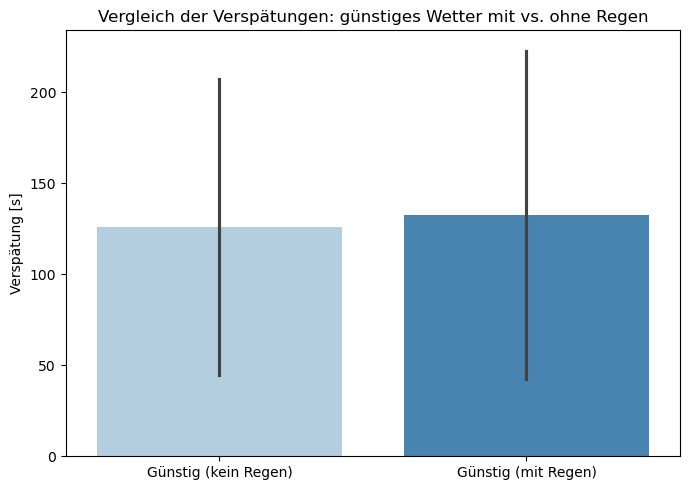

T-Test: Günstiges Wetter mit vs. ohne Regen
T-Statistik: 69.527
P-Wert: 0.000
→ Der Unterschied ist statistisch signifikant (p < 0.05).


In [8]:
from scipy.stats import ttest_ind

# --- Ergänzung: Definition für Bedingungen mit Regen ---
def wetter_mit_regen(df):
    bedingungen = (
        (df['NIEDERSCHLAG [mm]'] > 0) &
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    )
    return df[bedingungen].copy()

# --- Daten filtern für beide Gruppen ---
guenstig_df = wetter_mit_guenstigen_bedingungen(df)
regen_df = wetter_mit_regen(df)

# --- Statistik beider Gruppen berechnen und zusammenführen ---
vergleich_statistik_df = pd.concat([
    statistik_berechnen(guenstig_df, "Günstig (kein Regen)"),
    statistik_berechnen(regen_df, "Günstig (mit Regen)")
])

# Statistik-Tabelle anzeigen
display(vergleich_statistik_df)

# --- Plot generieren zum Vergleich ---
vergleich_plot_df = pd.concat([
    guenstig_df.assign(Wetterlage="Günstig (kein Regen)"),
    regen_df.assign(Wetterlage="Günstig (mit Regen)")
])

plt.figure(figsize=(7, 5))
sns.barplot(
    data=vergleich_plot_df,
    x='Wetterlage',
    y='VERSPAETUNG [s]',
    hue='Wetterlage',
    palette='Blues',
    errorbar='sd',
    legend=False
)
plt.title("Vergleich der Verspätungen: günstiges Wetter mit vs. ohne Regen")
plt.ylabel("Verspätung [s]")
plt.xlabel("")
plt.tight_layout()
plt.show()

# --- T-Test durchführen ---
t_stat, p_value = ttest_ind(
    regen_df['VERSPAETUNG [s]'],
    guenstig_df['VERSPAETUNG [s]'],
    equal_var=False  # Welch’s T-Test, falls Varianzen ungleich
)

# --- T-Test-Ergebnis anzeigen ---
print("T-Test: Günstiges Wetter mit vs. ohne Regen")
print(f"T-Statistik: {t_stat:.3f}")
print(f"P-Wert: {p_value:.3f}")

if p_value < 0.05:
    print("→ Der Unterschied ist statistisch signifikant (p < 0.05).")
else:
    print("→ Kein statistisch signifikanter Unterschied (p ≥ 0.05).")


In [ ]:
## Interpretation
Bei Regen lag die durchschnittliche Verspätung bei 133 Sekunden, bei trockenen Bedingungen bei 126 Sekunden. 
Der Unterschied ist zwar relativ gering, aber aufgrund der großen Datenmenge statistisch signifikant (p < 0.05).

Allerdings ist zu beachten, dass die Anzahl an Messwerten bei Regen (ca. 920'000) deutlich geringer ist als bei 
trockenen Bedingungen (über 5,7 Mio.). Der Effekt könnte daher auch teilweise durch ungleich verteilte Stichprobengrössen
beeinflusst sein und sollte entsprechend vorsichtig interpretiert werden.

,count,mean,median,std,min,max
Temperaturgruppe,,,,,,
<0°C,119781,111.809594,93.0,66.298812,61.0,1785.0
0–5°C,1094712,128.165268,102.0,89.866582,61.0,1800.0
5–10°C,2182409,126.837954,101.0,88.039316,61.0,1800.0
10–15°C,2264039,126.307432,102.0,82.002732,61.0,1800.0
15–20°C,1844317,126.935208,102.0,82.404274,61.0,1799.0
>20°C,2577780,127.292474,102.0,83.304522,61.0,1800.0


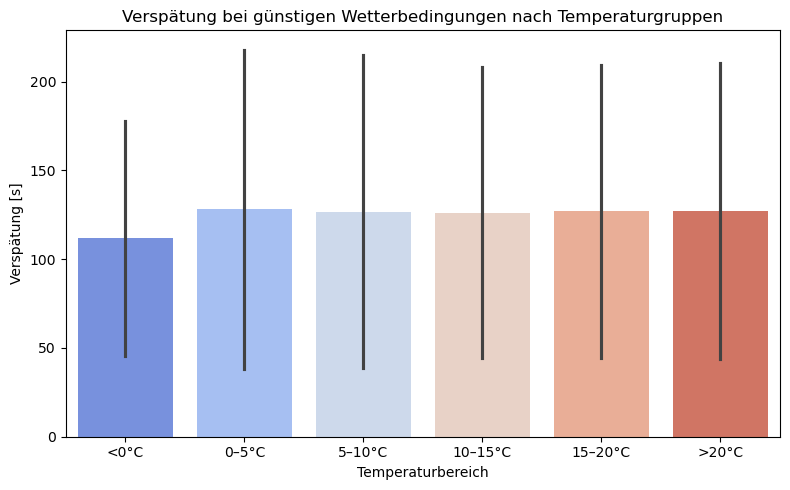

Korrelationsanalyse: Temperatur vs. Verspätung bei günstigem Wetter
------------------------------------------------------------------
r-Wert: 0.006, p-Wert: 0.00000
Signifikant

Korrelationsanalyse je Temperaturgruppe:
---------------------------------------
0–5°C: r = 0.037, p = 0.00000 (signifikant)
5–10°C: r = -0.030, p = 0.00000 (signifikant)
10–15°C: r = 0.007, p = 0.00000 (signifikant)
15–20°C: r = -0.013, p = 0.00000 (signifikant)
>20°C: r = 0.028, p = 0.00000 (signifikant)
<0°C: r = -0.025, p = 0.00000 (signifikant)


In [20]:
# --- Imports ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Schritt 1: Definition günstiger Wetterbedingungen (ohne Temperaturfilter) ---
def wetter_guenstig_ohne_tempfilter(df):
    return df[
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0)
    ].copy()

# --- Schritt 2: Temperatur in Gruppen einteilen ---
def wetter_guenstig_mit_tempgruppen(df):
    guenstig = wetter_guenstig_ohne_tempfilter(df)
    bins = [-float('inf'), 0, 5, 10, 15, 20, float('inf')]
    labels = ['<0°C', '0–5°C', '5–10°C', '10–15°C', '15–20°C', '>20°C']
    guenstig['Temperaturgruppe'] = pd.cut(guenstig['TEMPERATUR [°C]'], bins=bins, labels=labels)
    return guenstig

# --- Schritt 3: Statistik & Plot der Temperaturgruppen ---
def plot_tempgruppen_statistik(df):
    gruppen_statistik = df.groupby("Temperaturgruppe", observed=True)["VERSPAETUNG [s]"].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )
    display(gruppen_statistik)

    plt.figure(figsize=(8,5))
    sns.barplot(
        data=df,
        x='Temperaturgruppe',
        y='VERSPAETUNG [s]',
        hue='Temperaturgruppe',
        palette='coolwarm',
        errorbar='sd',
        legend=False
    )
    plt.title("Verspätung bei günstigen Wetterbedingungen nach Temperaturgruppen")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("Temperaturbereich")
    plt.tight_layout()
    plt.show()

# --- Schritt 4: Korrelationsanalyse Temperatur vs. Verspätung ---
def temperatur_korrelationsanalyse(df):
    guenstig = wetter_guenstig_ohne_tempfilter(df)
    r, p = stats.pearsonr(guenstig['TEMPERATUR [°C]'], guenstig['VERSPAETUNG [s]'])

    print("Korrelationsanalyse: Temperatur vs. Verspätung bei günstigem Wetter")
    print("------------------------------------------------------------------")
    print(f"r-Wert: {r:.3f}, p-Wert: {p:.5f}")
    print("Signifikant" if p < 0.05 else "Nicht signifikant")

# --- Schritt 5: Korrelationsanalyse innerhalb der Temperaturgruppen ---
def korrelation_nach_tempgruppen(df):
    gruppen = df['Temperaturgruppe'].unique()
    print("\nKorrelationsanalyse je Temperaturgruppe:")
    print("---------------------------------------")
    for gruppe in gruppen:
        teil_df = df[df['Temperaturgruppe'] == gruppe]
        if len(teil_df) > 2:
            r, p = stats.pearsonr(teil_df['TEMPERATUR [°C]'], teil_df['VERSPAETUNG [s]'])
            print(f"{gruppe}: r = {r:.3f}, p = {p:.5f} ({'signifikant' if p < 0.05 else 'nicht signifikant'})")
        else:
            print(f"{gruppe}: Nicht genug Daten für Korrelationsanalyse")

# --- Ausführung ---
# 1. Temperaturgruppen analysieren
gruppen_df = wetter_guenstig_mit_tempgruppen(df)
plot_tempgruppen_statistik(gruppen_df)

# 2. Gesamtkorrelation
temperatur_korrelationsanalyse(df)

# 3. Gruppenspezifische Korrelationen
korrelation_nach_tempgruppen(gruppen_df)

In [ ]:
## Interpretation
Die durchschnittliche Verspätung variiert mit der Temperatur nur geringfügig. 
Sie ist bei sehr niedrigen Temperaturen unter 0 °C mit 112 Sekunden am niedrigsten und steigt im Bereich 0–5 °C leicht auf rund 128 Sekunden 
an. Ab ca. 5 °C stabilisieren sich die Werte auf einem ähnlichen Niveau (126–127 Sekunden).

Die Korrelationsanalyse zeigt zwar einen statistisch signifikanten Zusammenhang zwischen Temperatur und Verspätung, 
allerdings ist der r-Wert mit 0.006 extrem niedrig. Auch innerhalb der Temperaturgruppen bewegen sich die Korrelationswerte 
zwischen -0.03 und 0.04 – also in einem Bereich, der auf keinen relevanten linearen Zusammenhang schließen lässt.

Fazit: Trotz hoher Signifikanz (bedingt durch grosse Fallzahlen) ist der tatsächliche Einfluss der Temperatur auf die Verspätung praktisch vernachlässigbar.

📊 Verspätungsstatistik nach Schneehöhe (nur Tage mit Schnee):


,count,mean,median,std,min,max
Schneegruppe,,,,,,
0–1 cm,96326,119.46,97.0,76.13,61.0,1765.0
1–5 cm,229343,126.47,101.0,85.02,61.0,1792.0
5–10 cm,41053,137.76,111.0,87.07,61.0,1756.0
10–20 cm,56424,270.65,179.0,257.80,61.0,1800.0


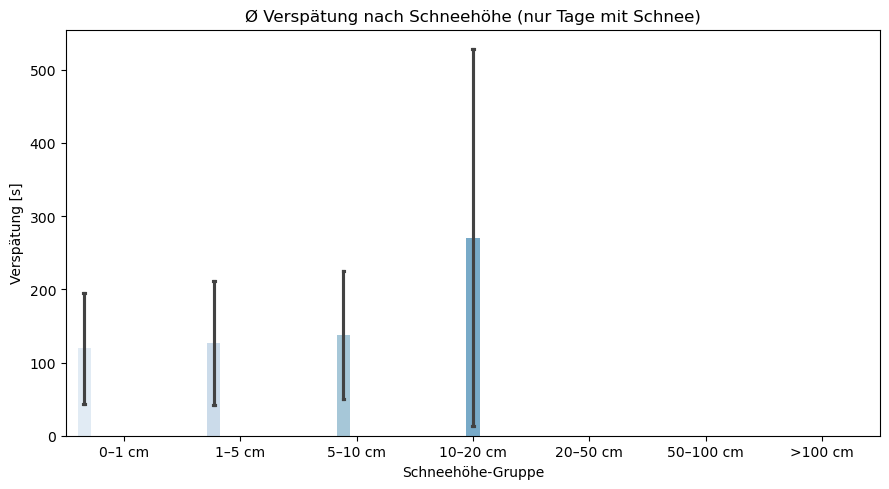

📈 Korrelationsanalyse: Schneehöhe vs. Verspätung
------------------------------------------------
Korrelationskoeffizient (r): 0.346
P-Wert: 0.00000
✅ Die Korrelation ist statistisch signifikant (p < 0.05).
→ Schwache Korrelation.


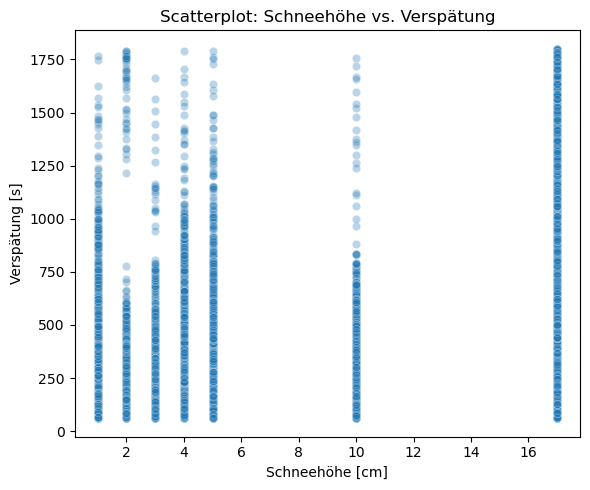


📊 Korrelationsanalyse je Schneegruppe:
--------------------------------------
1–5 cm: r = 0.021, p = 0.00000 → signifikant
0–1 cm: r = nan, p = nan → nicht signifikant
10–20 cm: r = nan, p = nan → nicht signifikant
5–10 cm: r = nan, p = nan → nicht signifikant


/var/folders/sj/737tscb12ss3jc_kmtbd_w8w0000gn/T/ipykernel_20369/3993147429.py:100: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stats.pearsonr(


In [26]:
# --- Imports ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Schritt 1: Schneegruppen erstellen ---
def schneegruppen_erstellen(df):
    schnee_df = df[df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] > 0].copy()
    bins = [0, 1, 5, 10, 20, 50, 100, float('inf')]
    labels = ['0–1 cm', '1–5 cm', '5–10 cm', '10–20 cm', '20–50 cm', '50–100 cm', '>100 cm']
    schnee_df['Schneegruppe'] = pd.cut(
        schnee_df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'],
        bins=bins,
        labels=labels
    )
    return schnee_df

# --- Schritt 2: Statistik-Tabelle anzeigen ---
def schneegruppen_statistik(df):
    statistik = df.groupby("Schneegruppe", observed=True)["VERSPAETUNG [s]"].agg(
        count='count',
        mean='mean',
        median='median',
        std='std',
        min='min',
        max='max'
    ).round(2)

    print("📊 Verspätungsstatistik nach Schneehöhe (nur Tage mit Schnee):")
    display(statistik)

# --- Schritt 3: Plot erstellen ---
def plot_schneegruppen(df):
    plt.figure(figsize=(9, 5))
    sns.barplot(
        data=df,
        x='Schneegruppe',
        y='VERSPAETUNG [s]',
        hue='Schneegruppe',
        palette='Blues',
        errorbar='sd',
        capsize=0.1,
        legend=False
    )
    plt.title("Ø Verspätung nach Schneehöhe (nur Tage mit Schnee)")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("Schneehöhe-Gruppe")
    plt.tight_layout()
    plt.show()

# --- Schritt 4: Gesamtkorrelation Schneehöhe vs. Verspätung ---
def korrelation_schnee_gesamt(df):
    schnee_df = df[df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] > 0].copy()
    r_wert, p_wert = stats.pearsonr(
        schnee_df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'],
        schnee_df['VERSPAETUNG [s]']
    )

    print("📈 Korrelationsanalyse: Schneehöhe vs. Verspätung")
    print("------------------------------------------------")
    print(f"Korrelationskoeffizient (r): {r_wert:.3f}")
    print(f"P-Wert: {p_wert:.5f}")

    if p_wert < 0.05:
        print("✅ Die Korrelation ist statistisch signifikant (p < 0.05).")
    else:
        print("⚠️ Die Korrelation ist statistisch nicht signifikant (p ≥ 0.05).")

    if abs(r_wert) > 0.7:
        print("→ Starke Korrelation.")
    elif abs(r_wert) > 0.4:
        print("→ Mittlere Korrelation.")
    elif abs(r_wert) > 0.2:
        print("→ Schwache Korrelation.")
    else:
        print("→ Sehr schwache oder keine Korrelation.")

    # Scatterplot
    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        x=schnee_df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'],
        y=schnee_df['VERSPAETUNG [s]'],
        alpha=0.3
    )
    plt.title("Scatterplot: Schneehöhe vs. Verspätung")
    plt.xlabel("Schneehöhe [cm]")
    plt.ylabel("Verspätung [s]")
    plt.tight_layout()
    plt.show()

# --- Schritt 5: Korrelation je Gruppe ---
def korrelation_nach_schneegruppen(df):
    schnee_df = schneegruppen_erstellen(df)
    print("\n📊 Korrelationsanalyse je Schneegruppe:")
    print("--------------------------------------")
    for gruppe in schnee_df['Schneegruppe'].dropna().unique():
        teil_df = schnee_df[schnee_df['Schneegruppe'] == gruppe]
        if len(teil_df) > 2:
            r, p = stats.pearsonr(
                teil_df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'],
                teil_df['VERSPAETUNG [s]']
            )
            print(f"{gruppe}: r = {r:.3f}, p = {p:.5f} → {'signifikant' if p < 0.05 else 'nicht signifikant'}")
        else:
            print(f"{gruppe}: Nicht genug Daten (n={len(teil_df)})")

# --- AUSFÜHRUNG ---
# Schrittweise ausführen:
schneegruppen_df = schneegruppen_erstellen(df)
schneegruppen_statistik(schneegruppen_df)
plot_schneegruppen(schneegruppen_df)
korrelation_schnee_gesamt(df)
korrelation_nach_schneegruppen(df)


In [ ]:
## Interpretation
Mit zunehmender Schneehöhe steigen die durchschnittlichen Verspätungen deutlich an – von 119 s bei 0–1 cm auf über 270 s bei 10–20 cm. 
Die Korrelation ist statistisch signifikant (r = 0.35, p < 0.001), aber nur schwach ausgeprägt.

Auffällig ist, dass bei starkem Schneefall in der Realität häufig Ausfälle auftreten, die im Datensatz jedoch nicht erfasst sind, 
da Extremfälle im Vorfeld entfernt wurden. Zudem ist die Fallzahl bei höheren Schneehöhen begrenzt
und innerhalb der Gruppen gibt es oft zu wenig Streuung, um eine stärkere Korrelation statistisch nachweisen zu können. 
Die tatsächlichen Auswirkungen von starkem Schnee könnten daher deutlich größer sein, 
als die Analyse vermuten lässt.

In [42]:
# --- Imports ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Günstige Bedingungen ---
def wetter_mit_guenstigen_bedingungen(df):
    return df[
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['NIEDERSCHLAG [mm]'] == 0) &
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    ].copy()

# --- Windgruppen > 20 km/h ---
def wetter_mit_windgruppen(df):
    wind_df = df[df['WINDGESCHWINDIGKEIT [kmh]'] > 20].copy()
    bins = [20, 30, 40, 60, float('inf')]
    labels = ['20–30 km/h', '30–40 km/h', '40–60 km/h', '>60 km/h']
    wind_df['Windgruppe'] = pd.cut(wind_df['WINDGESCHWINDIGKEIT [kmh]'], bins=bins, labels=labels)
    return wind_df

# --- Statistik berechnen ---
def statistik_berechnen(df, label):
    return pd.DataFrame({
        'Anzahl Werte': [df['VERSPAETUNG [s]'].count()],
        'Durchschnitt (s)': [df['VERSPAETUNG [s]'].mean()],
        'Median (s)': [df['VERSPAETUNG [s]'].median()],
        'Standardabweichung (s)': [df['VERSPAETUNG [s]'].std()],
        'Minimum (s)': [df['VERSPAETUNG [s]'].min()],
        'Maximum (s)': [df['VERSPAETUNG [s]'].max()]
    }, index=[label]).round(2)

# --- Statistik-Tabelle + Vergleich anzeigen ---
def windgruppen_statistik_mit_vergleich(wind_df, guenstig_df):
    gruppen_statistik = wind_df.groupby("Windgruppe", observed=True)["VERSPAETUNG [s]"].agg(
        count='count', mean='mean', median='median', std='std', min='min', max='max'
    ).round(2)

    vergleich_statistik = statistik_berechnen(guenstig_df, "Günstige Bedingungen")
    gesamt_df = pd.concat([vergleich_statistik, gruppen_statistik])
    print("📊 Statistik: Verspätungen bei Wind > 20 km/h inkl. Vergleich mit günstigem Wetter")
    display(gesamt_df)

# --- Aggregierter Plot mit Fehlerbalken ---
def plot_windgruppen_mit_vergleich(wind_df, guenstig_df):
    gruppen_mittelwerte = wind_df.groupby("Windgruppe", observed=True)["VERSPAETUNG [s]"].agg(['mean', 'std']).reset_index()
    gruppen_mittelwerte['Gruppe'] = gruppen_mittelwerte['Windgruppe'].astype(str)

    guenstig_mean = guenstig_df['VERSPAETUNG [s]'].mean()
    guenstig_std = guenstig_df['VERSPAETUNG [s]'].std()
    vergleich_row = pd.DataFrame([{
        'Gruppe': 'Günstige Bedingungen',
        'mean': guenstig_mean,
        'std': guenstig_std
    }])

    plot_df = pd.concat([vergleich_row, gruppen_mittelwerte[['Gruppe', 'mean', 'std']]]).reset_index(drop=True)

    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=plot_df,
        x='Gruppe',
        y='mean',
        hue='Gruppe',
        palette='Blues',
        legend=False
    )
    # Fehlerbalken manuell zeichnen
    for i, row in plot_df.iterrows():
        plt.errorbar(i, row['mean'], yerr=row['std'], fmt='none', color='black', capsize=5)

    plt.title("Ø Verspätung bei Wind über 20 km/h inkl. Vergleichsgruppe")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("Windgruppe")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


📊 Statistik: Verspätungen bei Wind > 20 km/h inkl. Vergleich mit günstigem Wetter


,Anzahl Werte,Durchschnitt (s),Median (s),Standardabweichung (s),Minimum (s),Maximum (s),count,mean,median,std,min,max
Günstige Bedingungen,5766614.0,125.91,101.0,81.31,61.0,1800.0,NaN,NaN,NaN,NaN,NaN,NaN
20–30 km/h,NaN,NaN,NaN,NaN,NaN,NaN,178098.0,130.19,103.0,88.62,61.0,1789.0
30–40 km/h,NaN,NaN,NaN,NaN,NaN,NaN,3102.0,110.15,94.0,53.33,61.0,415.0


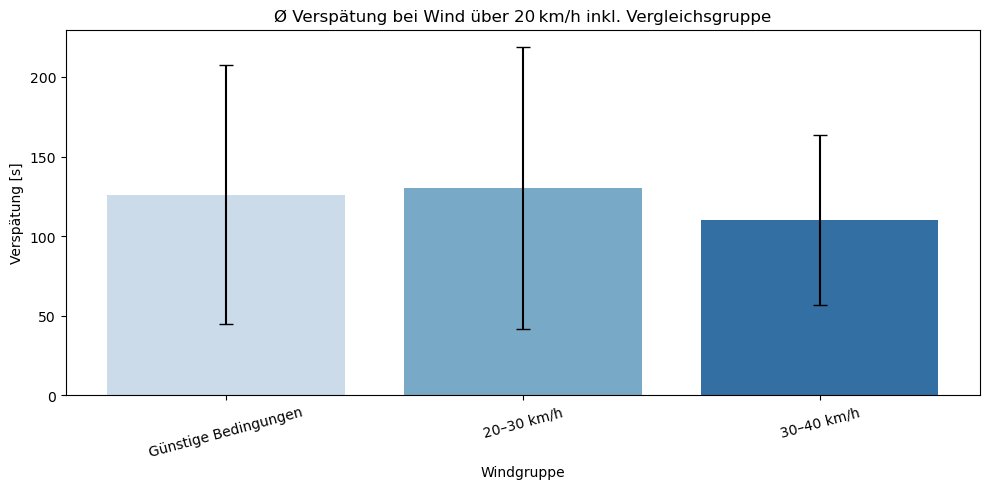

🧪 T-Test: Windgruppen vs. Günstige Bedingungen
-------------------------------------------------
20–30 km/h: t = 20.142, p = 0.00000 → ✅ signifikant (n=178098)
30–40 km/h: t = -16.446, p = 0.00000 → ✅ signifikant (n=3102)


In [50]:
guenstig_df = wetter_mit_guenstigen_bedingungen(df)
wind_df = wetter_mit_windgruppen(df)

windgruppen_statistik_mit_vergleich(wind_df, guenstig_df)
plot_windgruppen_mit_vergleich(wind_df, guenstig_df)
guenstig_df = wetter_mit_guenstigen_bedingungen(df)
wind_df = wetter_mit_windgruppen(df)

from scipy.stats import ttest_ind

def ttest_windgruppen_vs_guenstig(wind_df, guenstig_df):
    print("🧪 T-Test: Windgruppen vs. Günstige Bedingungen")
    print("-------------------------------------------------")

    guenstig_werte = guenstig_df['VERSPAETUNG [s]'].dropna()

    for gruppe in wind_df['Windgruppe'].dropna().unique():
        gruppe_df = wind_df[wind_df['Windgruppe'] == gruppe]
        werte = gruppe_df['VERSPAETUNG [s]'].dropna()

        if len(werte) > 2:
            t_stat, p_val = ttest_ind(werte, guenstig_werte, equal_var=False)
            signifikanz = "✅ signifikant" if p_val < 0.05 else "⚠️ nicht signifikant"
            print(f"{gruppe}: t = {t_stat:.3f}, p = {p_val:.5f} → {signifikanz} (n={len(werte)})")
        else:
            print(f"{gruppe}: Nicht genug Daten für T-Test (n={len(werte)})")

ttest_windgruppen_vs_guenstig(wind_df, guenstig_df)


In [ ]:
## Interpretation
Bei Wind zwischen 20–30 km/h steigen die Verspätungen leicht auf 130 s an – 
der Unterschied zu günstigen Bedingungen (126 s) ist statistisch signifikant.

Überraschend liegt die durchschnittliche Verspätung bei 30–40 km/h sogar tiefer (110 s), 
obwohl der T-Test auch hier Signifikanz zeigt. Ursache dafür könnte die sehr geringe Fallzahl (nur 3102 Werte) und 
ein fehlender Extrembereich sein – z. B. durch Ausfälle oder gefilterte Werte.

Fazit: Die Ergebnisse bei starkem Wind sollten wegen der geringen Datenbasis zurückhaltend interpretiert werden.

,Anzahl Werte,Durchschnitt (s),Median (s),Standardabweichung (s),Minimum (s),Maximum (s)
Günstige Bedingungen,5766614,125.905014,101.0,81.314087,61.0,1800.0
Hagel,40216,138.723344,107.0,105.662004,61.0,1712.0


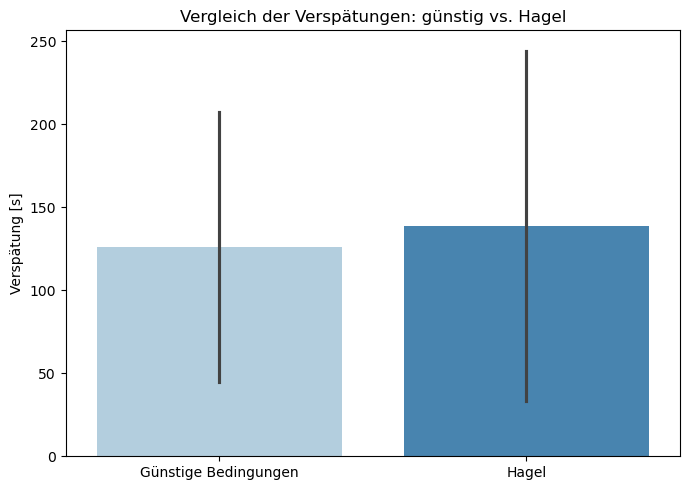


T-Test: Verspätung bei günstigen Bedingungen vs. Hagel
----------------------------------------------------
t-Statistik: -24.278
p-Wert: 0.00000
✅ Der Unterschied ist statistisch signifikant (p < 0.05).

Korrelationsanalyse: Hageltag vs. Verspätung
-------------------------------------------
r-Wert: 0.007, p-Wert: 0.00000 (signifikant)


In [38]:
# --- Imports ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Schritt 1: Definition günstiger Wetterbedingungen ---
def wetter_mit_guenstigen_bedingungen(df):
    bedingungen = (
        (df['NIEDERSCHLAG [mm]'] == 0) &
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    )
    return df[bedingungen].copy()

# --- Schritt 2: Statistik berechnen ---
def statistik_berechnen(df, label):
    statistik = {
        'Anzahl Werte': df['VERSPAETUNG [s]'].count(),
        'Durchschnitt (s)': df['VERSPAETUNG [s]'].mean(),
        'Median (s)': df['VERSPAETUNG [s]'].median(),
        'Standardabweichung (s)': df['VERSPAETUNG [s]'].std(),
        'Minimum (s)': df['VERSPAETUNG [s]'].min(),
        'Maximum (s)': df['VERSPAETUNG [s]'].max()
    }
    return pd.DataFrame(statistik, index=[label])

# --- Schritt 3: Plot generieren ---
def plot_verspaetungen(df_list, labels, title):
    plot_df = pd.concat([
        df.assign(Wetterlage=label) for df, label in zip(df_list, labels)
    ])
    plt.figure(figsize=(7,5))
    sns.barplot(
        data=plot_df,
        x='Wetterlage',
        y='VERSPAETUNG [s]',
        hue='Wetterlage',
        palette='Blues',
        errorbar='sd',
        legend=False
    )
    plt.title(title)
    plt.ylabel("Verspätung [s]")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

# --- Schritt 4: T-Test ---
def t_test_hagel_vs_guenstig(guenstig_df, hagel_df):
    print("\nT-Test: Verspätung bei günstigen Bedingungen vs. Hagel")
    print("----------------------------------------------------")
    t_stat, p_val = stats.ttest_ind(guenstig_df['VERSPAETUNG [s]'], hagel_df['VERSPAETUNG [s]'], equal_var=False, nan_policy='omit')
    print(f"t-Statistik: {t_stat:.3f}")
    print(f"p-Wert: {p_val:.5f}")
    if p_val < 0.05:
        print("✅ Der Unterschied ist statistisch signifikant (p < 0.05).")
    else:
        print("⚠️ Kein statistisch signifikanter Unterschied (p ≥ 0.05).")

# --- Schritt 5: Korrelationsanalyse ---
def korrelation_hagel(df):
    print("\nKorrelationsanalyse: Hageltag vs. Verspätung")
    print("-------------------------------------------")
    df_clean = df[['TAG_MIT_HAGEL', 'VERSPAETUNG [s]']].dropna()
    r, p = stats.pearsonr(df_clean['TAG_MIT_HAGEL'], df_clean['VERSPAETUNG [s]'])
    print(f"r-Wert: {r:.3f}, p-Wert: {p:.5f} ({'signifikant' if p < 0.05 else 'nicht signifikant'})")

# --- Ausführung mit deinem DataFrame (df) ---
# 1. Wetter mit günstigen Bedingungen
guenstig_df = wetter_mit_guenstigen_bedingungen(df)

# 2. Wetter mit Hagel (nur Hageltage)
hagel_df = df[df['TAG_MIT_HAGEL'] == 1].copy()

# 3. Statistik anzeigen
tabelle = pd.concat([
    statistik_berechnen(guenstig_df, "Günstige Bedingungen"),
    statistik_berechnen(hagel_df, "Hagel")
])
display(tabelle)

# 4. Plot anzeigen
plot_verspaetungen(
    [guenstig_df, hagel_df],
    ["Günstige Bedingungen", "Hagel"],
    "Vergleich der Verspätungen: günstig vs. Hagel"
)

# 5. T-Test
t_test_hagel_vs_guenstig(guenstig_df, hagel_df)

# 6. Korrelationsanalyse
korrelation_hagel(df)

In [ ]:
## Interpretation
An Hageltagen liegt die durchschnittliche Verspätung bei 139 Sekunden, also etwas höher als bei günstigen Bedingungen (126 Sekunden). 
Der Unterschied ist statistisch signifikant (p < 0.001), ebenso wie die Korrelation zwischen Hagel und Verspätung (r = 0.007).

Allerdings ist der Zusammenhang praktisch kaum relevant, da der Korrelationswert sehr gering ist. 
Die höhere Verspätung könnte mit Hagelereignissen zusammenhängen, muss aber vorsichtig interpretiert werden, 
da Hagel relativ selten auftritt (nur ca. 40'000 Werte).

,Anzahl Werte,Durchschnitt (s),Median (s),Standardabweichung (s),Minimum (s),Maximum (s)
Günstige Bedingungen,5766614,125.905014,101.0,81.314087,61.0,1800.0
Nebel,1366291,125.082533,100.0,87.485072,61.0,1799.0


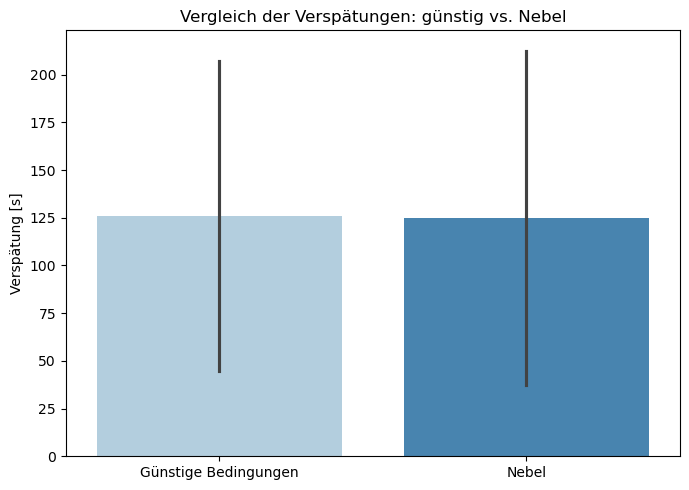


T-Test: Verspätung bei günstigen Bedingungen vs. Nebel
----------------------------------------------------
t-Statistik: 10.012
p-Wert: 0.00000
✅ Der Unterschied ist statistisch signifikant (p < 0.05).

Korrelationsanalyse: TAG_MIT_NEBEL vs. Verspätung
-------------------------------------------
r-Wert: -0.011, p-Wert: 0.00000 (signifikant)


In [40]:
# --- Imports ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Schritt 1: Definition günstiger Wetterbedingungen ---
def wetter_mit_guenstigen_bedingungen(df):
    bedingungen = (
        (df['NIEDERSCHLAG [mm]'] == 0) &
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    )
    return df[bedingungen].copy()

# --- Schritt 2: Statistik berechnen ---
def statistik_berechnen(df, label):
    statistik = {
        'Anzahl Werte': df['VERSPAETUNG [s]'].count(),
        'Durchschnitt (s)': df['VERSPAETUNG [s]'].mean(),
        'Median (s)': df['VERSPAETUNG [s]'].median(),
        'Standardabweichung (s)': df['VERSPAETUNG [s]'].std(),
        'Minimum (s)': df['VERSPAETUNG [s]'].min(),
        'Maximum (s)': df['VERSPAETUNG [s]'].max()
    }
    return pd.DataFrame(statistik, index=[label])

# --- Schritt 3: Plot generieren ---
def plot_verspaetungen(df_list, labels, title):
    plot_df = pd.concat([
        df.assign(Wetterlage=label) for df, label in zip(df_list, labels)
    ])
    plt.figure(figsize=(7,5))
    sns.barplot(
        data=plot_df,
        x='Wetterlage',
        y='VERSPAETUNG [s]',
        hue='Wetterlage',
        palette='Blues',
        errorbar='sd',
        legend=False
    )
    plt.title(title)
    plt.ylabel("Verspätung [s]")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

# --- Schritt 4: T-Test ---
def t_test_wettergruppen(df1, df2, label1, label2):
    print(f"\nT-Test: Verspätung bei {label1} vs. {label2}")
    print("----------------------------------------------------")
    t_stat, p_val = stats.ttest_ind(df1['VERSPAETUNG [s]'], df2['VERSPAETUNG [s]'], equal_var=False, nan_policy='omit')
    print(f"t-Statistik: {t_stat:.3f}")
    print(f"p-Wert: {p_val:.5f}")
    if p_val < 0.05:
        print("✅ Der Unterschied ist statistisch signifikant (p < 0.05).")
    else:
        print("⚠️ Kein statistisch signifikanter Unterschied (p ≥ 0.05).")

# --- Schritt 5: Korrelationsanalyse ---
def korrelation_wettermerkmal(df, merkmal):
    print(f"\nKorrelationsanalyse: {merkmal} vs. Verspätung")
    print("-------------------------------------------")
    df_clean = df[[merkmal, 'VERSPAETUNG [s]']].dropna()
    r, p = stats.pearsonr(df_clean[merkmal], df_clean['VERSPAETUNG [s]'])
    print(f"r-Wert: {r:.3f}, p-Wert: {p:.5f} ({'signifikant' if p < 0.05 else 'nicht signifikant'})")

# --- Ausführung mit deinem DataFrame (df) ---
# 1. Wetter mit günstigen Bedingungen
guenstig_df = wetter_mit_guenstigen_bedingungen(df)

# 2. Wetter mit Nebel (nur Nebeltage)
nebel_df = df[df['TAG_MIT_NEBEL'] == 1].copy()

# 3. Statistik anzeigen
tabelle = pd.concat([
    statistik_berechnen(guenstig_df, "Günstige Bedingungen"),
    statistik_berechnen(nebel_df, "Nebel")
])
display(tabelle)

# 4. Plot anzeigen
plot_verspaetungen(
    [guenstig_df, nebel_df],
    ["Günstige Bedingungen", "Nebel"],
    "Vergleich der Verspätungen: günstig vs. Nebel"
)

# 5. T-Test
t_test_wettergruppen(guenstig_df, nebel_df, "günstigen Bedingungen", "Nebel")

# 6. Korrelationsanalyse
korrelation_wettermerkmal(df, 'TAG_MIT_NEBEL')


In [ ]:
## Interpretation
Bei der Analyse des Einflusses von Nebel auf Verspätungen zeigt sich, dass die durchschnittliche Verspätung bei Nebel (125.08 s) 
im Vergleich zu günstigen Bedingungen (125.91 s) minimal geringer ist. 
Ein T-Test bestätigt, dass dieser Unterschied aufgrund der großen Stichprobe statistisch signifikant ist (p < 0.001), 
jedoch ist der praktische Unterschied vernachlässigbar. Auch die Korrelationsanalyse ergibt einen signifikanten, 
aber äusserst schwachen negativen Zusammenhang (r = –0.011), was darauf hinweist, dass Nebel keinen relevanten Einfluss 
auf die Höhe der Verspätungen hat.

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def wettervergleich_plot(df):
    # Definition günstiger Wetterbedingungen
    guenstig_filter = (
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['NIEDERSCHLAG [mm]'] == 0) &
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    )

    # Hilfsfunktion: Statistik für Gruppe berechnen
    def gruppe_stats(filterbedingung, label):
        gruppe = df[filterbedingung]
        return {
            'Gruppe': label,
            'Mittelwert': gruppe['VERSPAETUNG [s]'].mean(),
            'Std-Abweichung': gruppe['VERSPAETUNG [s]'].std(),
            'n': len(gruppe)
        }

    # Alle Wettergruppen mit entsprechender Filterbedingung
    daten = [
        gruppe_stats(guenstig_filter, "Günstige Bedingungen"),
        gruppe_stats(df['NIEDERSCHLAG [mm]'] > 0, "Mit Niederschlag"),
        gruppe_stats(df['TEMPERATUR [°C]'] < 0, "Temperatur < 0 °C"),
        gruppe_stats(df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] > 0, "Mit Schnee"),
        gruppe_stats(df['WINDGESCHWINDIGKEIT [kmh]'] > 20, "Wind > 20 km/h"),
        gruppe_stats(df['TAG_MIT_HAGEL'] == 1, "Mit Hagel"),
        gruppe_stats(df['TAG_MIT_NEBEL'] == 1, "Mit Nebel")
    ]

    df_plot = pd.DataFrame(daten).dropna()

    # Plot vorbereiten
    plt.figure(figsize=(11, 6))
    sns.barplot(
        data=df_plot,
        x='Gruppe',
        y='Mittelwert',
        palette='Blues',
        hue='Gruppe',
        legend=False
    )

    # Fehlerbalken (Standardabweichung) manuell zeichnen
    for i, row in df_plot.iterrows():
        plt.errorbar(i, row['Mittelwert'], yerr=row['Std-Abweichung'], fmt='none', color='black', capsize=5)

    # Plot beschriften
    plt.title("Ø Verspätung [s] im Vergleich verschiedener Wetterbedingungen")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

    # Tabelle ausgeben
    print("📊 Vergleichstabelle:")
    display(df_plot.round(2))


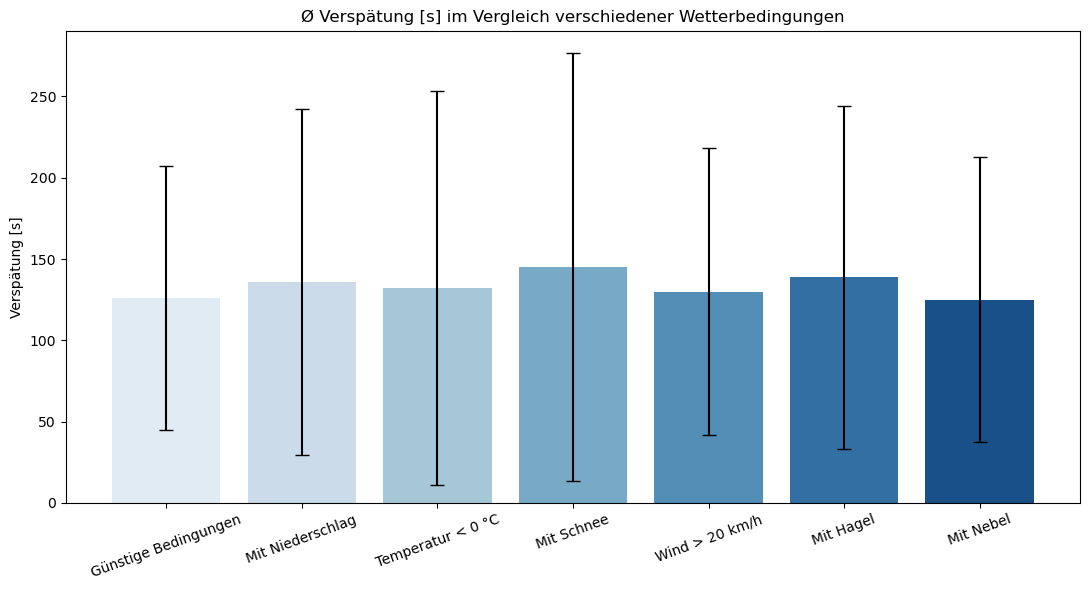

📊 Vergleichstabelle:


,Gruppe,Mittelwert,Std-Abweichung,n
0,Günstige Bedingungen,125.91,81.31,5766614
1,Mit Niederschlag,136.01,106.57,1707309
2,Temperatur < 0 °C,131.96,121.23,431080
3,Mit Schnee,145.20,131.45,423146
4,Wind > 20 km/h,129.85,88.18,181200
5,Mit Hagel,138.72,105.66,40216
6,Mit Nebel,125.08,87.49,1366291


In [64]:
wettervergleich_plot(df)

In [ ]:
## Interpretation
Die Analyse zeigt, dass verschiedene Wetterbedingungen unterschiedlich starke Auswirkungen auf die Höhe der Verspätungen haben. 
Während sich bei Nebel kaum ein Unterschied zu günstigen Bedingungen feststellen lässt (125.08 s vs. 125.91 s), 
führen andere Wetterphänomene zu deutlich höheren durchschnittlichen Verspätungen.Besonders Schnee hat mit durchschnittlich 145.20 
Sekunden den größten Einflussss, gefolgt von Hagel (138.72 s) und allgemeinem Niederschlag (136.01 s. Auch Temperaturen unter 0 °C (131.96 )
)und starker Wind mit über 20 km/h (129.85 s  führen zu leicht erhöhten Verspätungswerte.
Nebe den Mittelwerten steigt bei schlechteren Wetterbedingungen auch die Streuung der Verspätungen deutlich,
 was auf eine höhere Unvorhersehbarkeit hindeutett. Insgesamt lässt sich festhalte, dass vor allem Schnee undd
 Niederschlag relevante Verzögerungen verursachen,, während Nebel kaum eine praktische Rolle spielt.